<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Standarize-variables" data-toc-modified-id="1.-Standarize-variables-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. Standarize variables</a></span></li><li><span><a href="#2.-Clustering-with-K-mean" data-toc-modified-id="2.-Clustering-with-K-mean-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. Clustering with K-mean</a></span><ul class="toc-item"><li><span><a href="#2.1-.-Choosing-K" data-toc-modified-id="2.1-.-Choosing-K-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>2.1 . Choosing K</a></span><ul class="toc-item"><li><span><a href="#2.2.1.-Elbows" data-toc-modified-id="2.2.1.-Elbows-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>2.2.1. Elbows</a></span></li><li><span><a href="#2.2.1.-Silouhete" data-toc-modified-id="2.2.1.-Silouhete-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>2.2.1. Silouhete</a></span></li></ul></li></ul></li><li><span><a href="#3.-I-choose-for-10-cluster-in-k-mean-model" data-toc-modified-id="3.-I-choose-for-10-cluster-in-k-mean-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3. I choose for 10 cluster in k-mean model</a></span></li><li><span><a href="#4.-Export-model" data-toc-modified-id="4.-Export-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>4. Export model</a></span></li></ul></div>

# Scaling and training the model K-means

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score #evaluate clustering
import pickle #save my models trained
import pandas as pd
import numpy as np

In [26]:
audio_features_for_cluster = pd.read_csv("../data/audio_features_for_cluster.csv",index_col=False)

In [27]:
audio_features_for_cluster = audio_features_for_cluster.iloc[:,1:] # I delete the first extra index column

In [28]:
audio_features_for_cluster

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.759,0.459,8.0,-5.187,1.0,0.0948,0.003230,0.000000,0.0906,0.695,109.997
1,0.556,0.661,6.0,-5.052,0.0,0.2040,0.300000,0.000000,0.1010,0.668,168.560
2,0.702,0.825,6.0,-3.787,0.0,0.0601,0.008830,0.000000,0.0674,0.915,102.977
3,0.677,0.696,0.0,-6.181,1.0,0.1190,0.321000,0.000000,0.4200,0.464,90.030
4,0.586,0.616,5.0,-7.964,1.0,0.0324,0.182000,0.000000,0.0927,0.719,148.088
...,...,...,...,...,...,...,...,...,...,...,...
10113,0.346,0.944,9.0,-9.874,1.0,0.0485,0.000042,0.565000,0.0546,0.403,179.630
10114,0.609,0.679,0.0,-4.545,1.0,0.0312,0.243000,0.000000,0.1990,0.487,122.034
10115,0.897,0.371,1.0,-5.019,1.0,0.3680,0.090400,0.000000,0.3250,0.441,81.008
10116,0.964,0.398,11.0,-8.981,0.0,0.0795,0.001510,0.000039,0.1010,0.563,105.012


## 1. Standarize variables

In [29]:
scaler= StandardScaler() #I store it in this variable
scaler.fit(audio_features_for_cluster) #we are telling thim where to find the mean and standard deviation
audio_features_for_cluster_scaled = scaler.transform(audio_features_for_cluster)

In [30]:
audio_features_for_cluster_scaled

array([[ 0.8398375 , -0.92077204,  0.77220778, ..., -0.63244843,
         0.65110093, -0.41293743],
       [-0.44320467,  0.01261074,  0.21567253, ..., -0.56301692,
         0.54115297,  1.73970326],
       [ 0.47957442,  0.77040666,  0.21567253, ..., -0.78733409,
         1.54697315, -0.67097642],
       ...,
       [ 1.71205336, -1.32739425, -1.17566558, ...,  0.93243086,
        -0.38322428, -1.47850614],
       [ 2.13552048, -1.20263516,  1.60701064, ..., -0.56301692,
         0.11357759, -0.59617452],
       [ 0.16987459, -0.6204261 ,  1.60701064, ...,  0.11794591,
         0.07285613, -1.36962986]])

In [31]:
#Now I create a data fram with the arrays

scaled_df = pd.DataFrame(audio_features_for_cluster_scaled, columns=audio_features_for_cluster.columns)

In [32]:
scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1.011800e+04,1.011800e+04,1.011800e+04,1.011800e+04,1.011800e+04,1.011800e+04,1.011800e+04,1.011800e+04,1.011800e+04,1.011800e+04,1.011800e+04
mean,6.741659e-17,1.151700e-16,4.073085e-17,-4.438259e-16,7.303464e-17,-4.494439e-17,5.056244e-17,-5.618049e-18,-4.213537e-17,-1.516873e-16,3.016190e-16
std,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00
min,-3.957350e+00,-3.038410e+00,-1.453933e+00,-8.327050e+00,-1.240573e+00,-9.847531e-01,-8.456837e-01,-3.103306e-01,-1.137162e+00,-2.179041e+00,-4.456173e+00
25%,-5.696128e-01,-5.649776e-01,-8.973980e-01,-3.120252e-01,-1.240573e+00,-5.687322e-01,-7.572319e-01,-3.103306e-01,-6.170934e-01,-7.782225e-01,-7.799170e-01
50%,9.402973e-02,1.881976e-01,-6.259509e-02,2.659825e-01,8.060791e-01,-4.131565e-01,-4.442551e-01,-3.103027e-01,-3.961143e-01,1.584608e-02,2.642726e-02
75%,6.928881e-01,7.657860e-01,7.722078e-01,6.092896e-01,8.060791e-01,7.316157e-02,4.323287e-01,-3.051157e-01,3.516096e-01,8.180589e-01,5.605717e-01
max,2.230327e+00,1.579030e+00,1.607011e+00,1.986660e+00,8.060791e-01,9.894021e+00,2.692618e+00,4.735883e+00,5.358689e+00,1.893106e+00,3.376413e+00


## 2. Clustering with K-mean

### 2.1 . Choosing K

#### 2.2.1. Elbows

In [33]:
K = range(2, 20)

inertia = [] #sotre the inertia values

for k in K:
    kmeans = KMeans(n_clusters=k,random_state=1234)
    kmeans.fit(scaled_df) # i train it with that, is alraady scaled
    inertia.append(kmeans.inertia_)
      

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

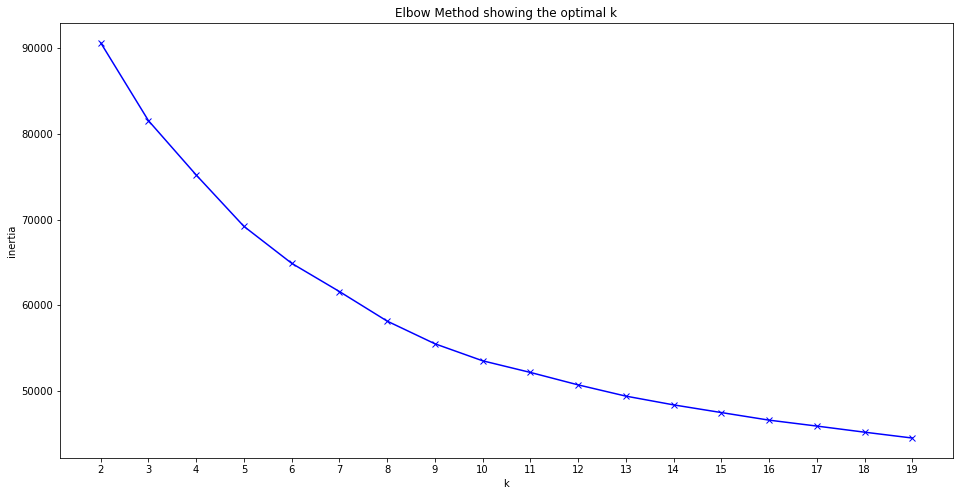

In [35]:
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

###Maybe at 15 we can see a little elbow

In [36]:
#Not clear elbows...

#### 2.2.1. Silouhete

In [37]:
 #same settings as before
K2 = range(2, 20)

silhouette2 = []

for k in K2:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(scaled_df) #i can use the data framo r the array
    silhouette2.append(silhouette_score(scaled_df, kmeans.predict(scaled_df)))


Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

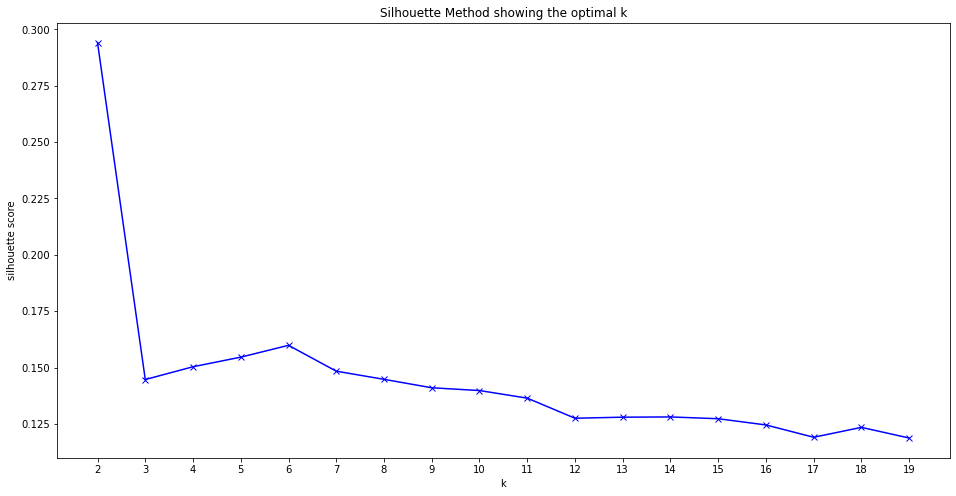

In [38]:
plt.figure(figsize=(16,8))
plt.plot(K2, silhouette2, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K2), max(K2)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [39]:
#There is a clear pick at 7, I could also go for 10...

In [40]:
# I will pick 17 that is more or lessa peak... and slitghtly an elbow

## 3. I choose for 10 cluster in k-mean model

In [41]:
#10 clusters
kmeans = KMeans(n_clusters=17, random_state=1234)
kmeans.fit(scaled_df)

KMeans(n_clusters=17, random_state=1234)

In [42]:
clusters = kmeans.predict(scaled_df)
clusters

array([13,  6,  4, ..., 11,  4,  4], dtype=int32)

In [43]:
np.isnan(clusters).sum()

0

In [44]:
pd.Series(clusters).value_counts().sort_index()

0      307
1      736
2      902
3      614
4      990
5      178
6      334
7      888
8      548
9      677
10     165
11     508
12     438
13    1006
14     836
15     617
16     374
dtype: int64

In [45]:
#ADD THE LABELS TO MY ORIGINAL TABLE

audio_features_for_cluster["cluster"] = clusters #I create the new colum cluster
audio_features_for_cluster.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.759,0.459,8.0,-5.187,1.0,0.0948,0.00323,0.0,0.0906,0.695,109.997,13
1,0.556,0.661,6.0,-5.052,0.0,0.2040,0.30000,0.0,0.1010,0.668,168.560,6
2,0.702,0.825,6.0,-3.787,0.0,0.0601,0.00883,0.0,0.0674,0.915,102.977,4
3,0.677,0.696,0.0,-6.181,1.0,0.1190,0.32100,0.0,0.4200,0.464,90.030,1
4,0.586,0.616,5.0,-7.964,1.0,0.0324,0.18200,0.0,0.0927,0.719,148.088,15


In [46]:
###export the file

audio_features_for_cluster.to_csv("../data/audio_features_for_cluster_labeled.csv")

## 4. Export model

In [47]:
import pickle

#scaler = StandardScaler()
#model = KMeans()

#this is the scaler that i am saving

with open("../data/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)


In [48]:
#same for k-means

with open("../data/kmeans.pickle", "wb") as f:
    pickle.dump(kmeans,f)